In [1]:
import numpy as np
import pandas as pd

## Read the Data

In [2]:
df = pd.read_csv('../../DATA/kaggle/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Inspect the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [7]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# Explore and Analysis

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

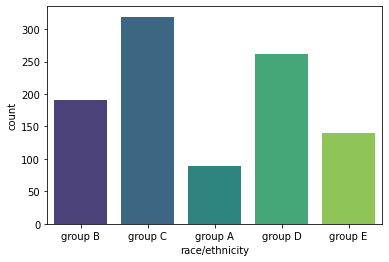

In [9]:
import seaborn as sns 
sns.countplot(x='race/ethnicity',data=df,palette='viridis')

<b>Number of students by Race/Ethnicity </b>

<AxesSubplot:>

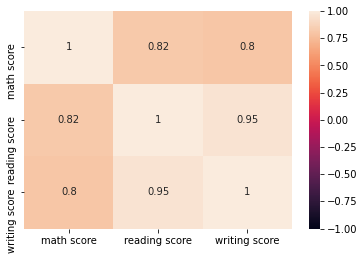

In [10]:
sns.heatmap(df.corr(),vmin=-1,annot=True)

<b> Correlation Metric</b>

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

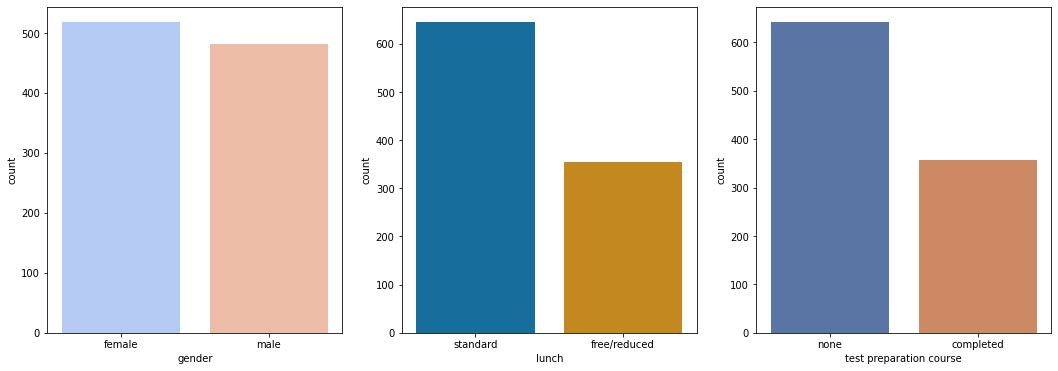

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(ax=axes[0],x='gender',data=df,palette='coolwarm')
sns.countplot(ax=axes[1],x='lunch',data=df,palette='colorblind')
sns.countplot(ax=axes[2],x='test preparation course',data=df,palette='deep')

<AxesSubplot:xlabel='writing score', ylabel='Count'>

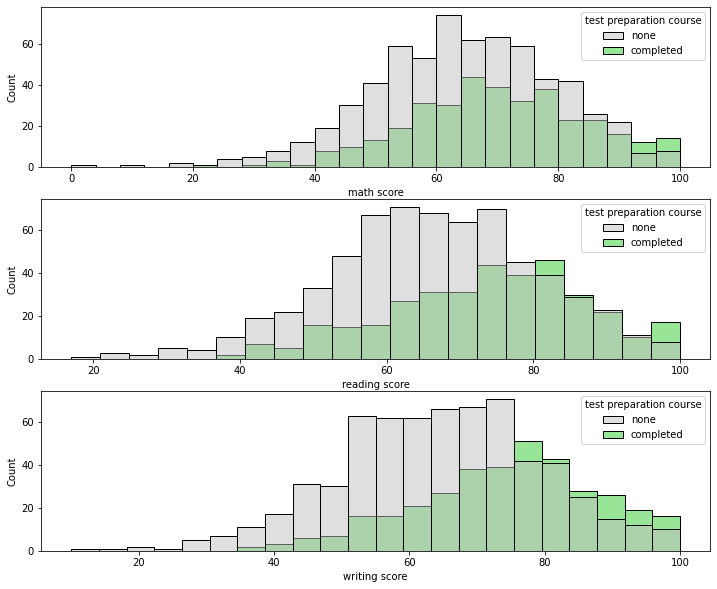

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

sns.histplot(ax=axes[0],x='math score',data=df,
             hue='test preparation course',palette=["silver",'limegreen']) 

sns.histplot(ax=axes[1],x='reading score',data=df,
             hue='test preparation course',palette=["silver",'limegreen'])

sns.histplot(ax=axes[2],x='writing score',data=df,
             hue='test preparation course',palette=["silver",'limegreen'])

<b> High Preparation has Higher Score</b>

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

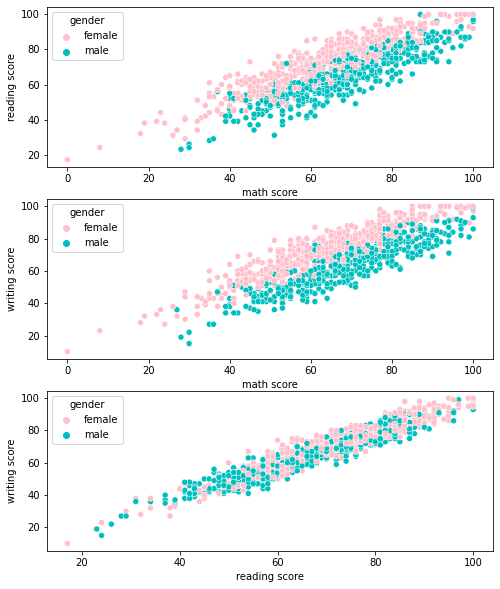

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10))

sns.scatterplot(ax=axes[0],x='math score',y='reading score',
                data=df,hue='gender', palette=["pink",'c'])

sns.scatterplot(ax=axes[1],x='math score',y='writing score',
                data=df,hue='gender', palette=["pink",'c'])

sns.scatterplot(ax=axes[2],x='reading score',y='writing score',
                data=df,hue='gender', palette=["pink",'c'])

- Boys perform better on Math (Fig 1 & 2)
- Girls perform better on Reading and Writting (Fig 3)

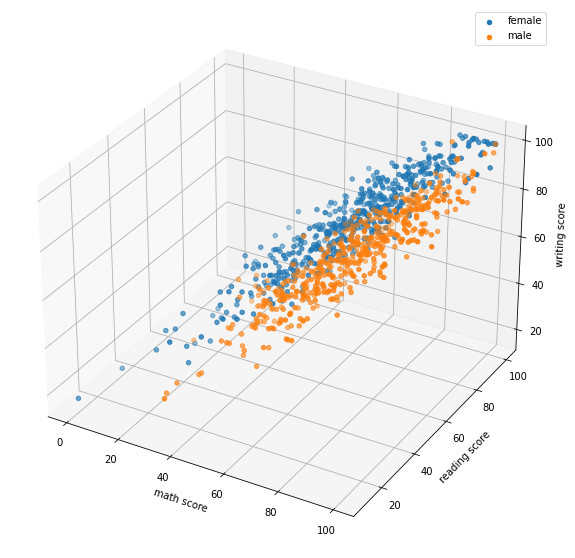

In [19]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = df['math score']
y = df['reading score']
z = df['writing score']

ax.set_xlabel("math score")
ax.set_ylabel("reading score")
ax.set_zlabel("writing score")

#cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())
#sc = ax.scatter(x, y, z, s=15, c=x, marker='o', cmap=cmap, alpha=1)
#plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

for s in df.gender.unique():
    ax.scatter(df['math score'][df.gender==s],df['writing score']
               [df.gender==s],df['reading score'][df.gender==s],label=s)

ax.legend()

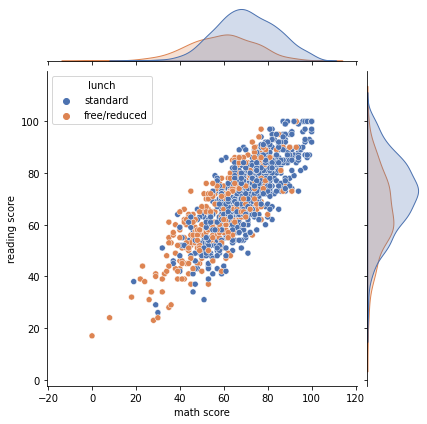

In [20]:
sns.jointplot(x='math score',y='reading score',data=df,hue='lunch',palette='deep')

<b> Students with standard lunch tends to perform better</b>

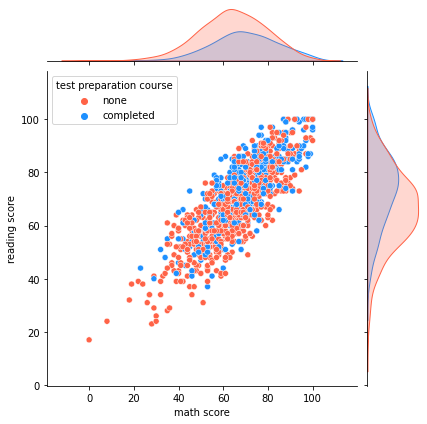

In [21]:
sns.jointplot(x='math score',y='reading score',data=df,
              hue='test preparation course',palette=['tomato','dodgerblue'])

## Data manipulation

### Add Grade Columns

In [22]:
def grader(x):  # a function to generate grades 
    if x>85:
        return 'A'
    elif (x>70 and x<= 85):
        return 'B'
    elif (x>55 and x<=70):
        return 'C' 
    elif (x>40 and x<=55):
        return 'D'
    else:
        return 'E'

In [23]:
df['overall score'] = (df['math score'] + df['writing score'] + df['reading score'])/3

df['grade'] = df['overall score'].apply(grader) 

<AxesSubplot:xlabel='grade', ylabel='count'>

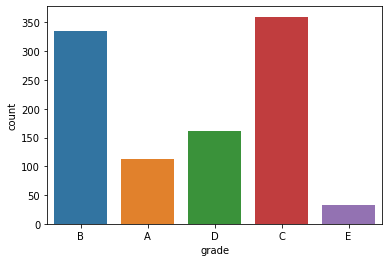

In [24]:
sns.countplot(x='grade',data=df)

<AxesSubplot:xlabel='overall score', ylabel='Count'>

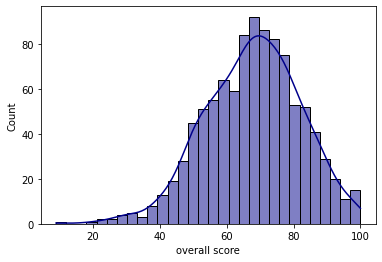

In [25]:
sns.histplot(x='overall score',data =df,bins=30,kde=True,color='darkblue')

<AxesSubplot:xlabel='parental level of education', ylabel='overall score'>

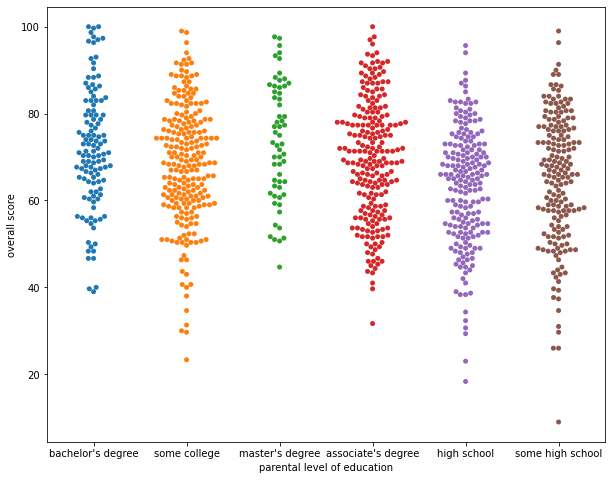

In [26]:
plt.figure(figsize=(10,8))
sns.swarmplot(x='parental level of education',y='overall score',data=df)

<b> students who have Master Degree parents perform better and relatively low variance </b>

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

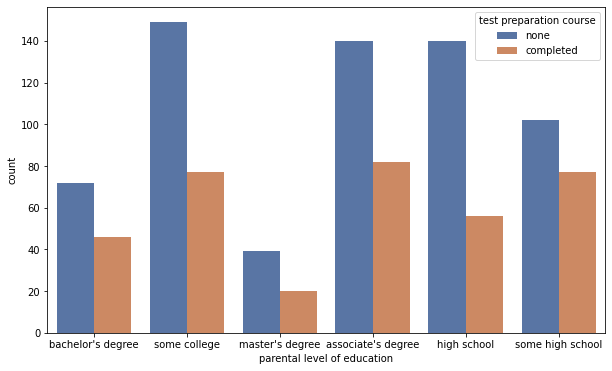

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='parental level of education',data=df,palette='deep',hue='test preparation course')

<AxesSubplot:xlabel='reading score', ylabel='math score'>

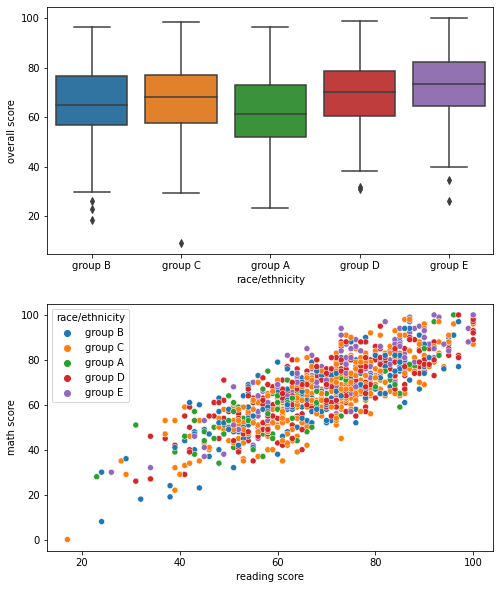

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.boxplot(ax=axes[0],x='race/ethnicity',
            y='overall score',data=df)

sns.scatterplot(ax=axes[1],x='reading score',
                y='math score', hue='race/ethnicity',data=df)

<b>Race/Ethnicity has no relation with the student performance</b>